DESCRIPTION

The dataset provided contains movie reviews given by Amazon customers. Reviews were given between May 1996 and July 2014.

Data Dictionary
UserID – 4848 customers who provided a rating for each movie
Movie 1 to Movie 206 – 206 movies for which ratings are provided by 4848 distinct users

Data Considerations
- All the users have not watched all the movies and therefore, all movies are not rated. These missing values are represented by NA.
- Ratings are on a scale of -1 to 10 where -1 is the least rating and 10 is the best.

Analysis Task
- Exploratory Data Analysis:

- Which movies have maximum views/ratings?
- What is the average rating for each movie? 
- Define the top 5 movies with the maximum ratings.
- Define the top 5 movies with the least audience.
- Recommendation Model: Some of the movies hadn’t been watched and therefore, are not rated by the users. Netflix would like to take this as an opportunity and build a machine learning recommendation algorithm which provides the ratings for each of the users.

- Divide the data into training and test data
- Build a recommendation model on training data
- Make predictions on the test data

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
# ----------------------------
# CONFIGURATION
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
Movie_df = pd.read_csv('C:/Users/Workstation/OneDrive/Desktop/Data Science_Material/Machne Learning/Project/Project 5- Recommendation Model for Amazon/Amazon - Movies and TV Ratings.csv')

In [3]:
Movie_df.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
Movie_df.shape

(4848, 207)

In [5]:
Movie_df.describe()

,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
count,1.0,1.0,1.0,2.0,29.000000,1.0,1.0,1.0,1.0,1.0,...,5.000000,2.0,1.0,8.000000,3.000000,6.000000,1.0,8.000000,35.000000,13.000000
mean,5.0,5.0,2.0,5.0,4.103448,4.0,5.0,5.0,5.0,5.0,...,3.800000,5.0,5.0,4.625000,4.333333,4.333333,3.0,4.375000,4.628571,4.923077
std,NaN,NaN,NaN,0.0,1.496301,NaN,NaN,NaN,NaN,NaN,...,1.643168,0.0,NaN,0.517549,1.154701,1.632993,NaN,1.407886,0.910259,0.277350
min,5.0,5.0,2.0,5.0,1.000000,4.0,5.0,5.0,5.0,5.0,...,1.000000,5.0,5.0,4.000000,3.000000,1.000000,3.0,1.000000,1.000000,4.000000
25%,5.0,5.0,2.0,5.0,4.000000,4.0,5.0,5.0,5.0,5.0,...,4.000000,5.0,5.0,4.000000,4.000000,5.000000,3.0,4.750000,5.000000,5.000000
50%,5.0,5.0,2.0,5.0,5.000000,4.0,5.0,5.0,5.0,5.0,...,4.000000,5.0,5.0,5.000000,5.000000,5.000000,3.0,5.000000,5.000000,5.000000
75%,5.0,5.0,2.0,5.0,5.000000,4.0,5.0,5.0,5.0,5.0,...,5.000000,5.0,5.0,5.000000,5.000000,5.000000,3.0,5.000000,5.000000,5.000000
max,5.0,5.0,2.0,5.0,5.000000,4.0,5.0,5.0,5.0,5.0,...,5.000000,5.0,5.0,5.000000,5.000000,5.000000,3.0,5.000000,5.000000,5.000000


In [6]:
df_main = Movie_df.copy()

Which movies have maximum views/ratings?

In [7]:
Movie_df.describe().T["count"].sort_values(ascending = False)[:10].to_frame()

,count
Movie127,2313.0
Movie140,578.0
Movie16,320.0
Movie103,272.0
Movie29,243.0
Movie91,128.0
Movie92,101.0
Movie89,83.0
Movie158,66.0
Movie108,54.0


Define the top 5 movies with the maximum ratings

In [8]:
high_rated = pd.DataFrame(Movie_df.drop('user_id', axis = 1).sum().sort_values(ascending = False)[:5])
high_rated

,0
Movie127,9511.0
Movie140,2794.0
Movie16,1446.0
Movie103,1241.0
Movie29,1168.0


What is the average rating for each movie?

In [9]:
average_rated = pd.DataFrame(Movie_df.drop('user_id', axis = 1).mean().sort_values(ascending = False)).rename({0: "Rating"}, axis = 1)
average_rated

,Rating
Movie1,5.0
Movie66,5.0
Movie76,5.0
Movie75,5.0
Movie74,5.0
...,...
Movie58,1.0
Movie60,1.0
Movie154,1.0
Movie45,1.0


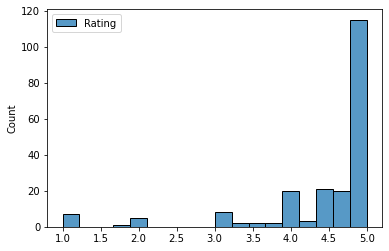

In [10]:
sns.histplot(average_rated)

Define the top 5 movies with the least audience

In [11]:
Movie_df.describe().T["count"].sort_values(ascending = True)[:5].to_frame()

,count
Movie1,1.0
Movie71,1.0
Movie145,1.0
Movie69,1.0
Movie68,1.0


In [12]:
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

In [13]:
Movie_df.columns

Index(['user_id', 'Movie1', 'Movie2', 'Movie3', 'Movie4', 'Movie5', 'Movie6',
       'Movie7', 'Movie8', 'Movie9',
       ...
       'Movie197', 'Movie198', 'Movie199', 'Movie200', 'Movie201', 'Movie202',
       'Movie203', 'Movie204', 'Movie205', 'Movie206'],
      dtype='object', length=207)

In [14]:
melt_df = Movie_df.melt(id_vars = Movie_df.columns[0], value_vars = Movie_df.columns[1:], var_name = "movie_name", value_name = "rating")
melt_df

,user_id,movie_name,rating
0,A3R5OBKS7OM2IR,Movie1,5.0
1,AH3QC2PC1VTGP,Movie1,NaN
2,A3LKP6WPMP9UKX,Movie1,NaN
3,AVIY68KEPQ5ZD,Movie1,NaN
4,A1CV1WROP5KTTW,Movie1,NaN
...,...,...,...
998683,A1IMQ9WMFYKWH5,Movie206,5.0
998684,A1KLIKPUF5E88I,Movie206,5.0
998685,A5HG6WFZLO10D,Movie206,5.0
998686,A3UU690TWXCG1X,Movie206,5.0


In [16]:
from surprise import Dataset

In [30]:
reader = Reader(rating_scale = (-1,10))
data = Dataset.load_from_df(melt_df.fillna(melt_df.mean()), reader = reader)

In [31]:
trainset, testset = train_test_split(data, test_size = 0.25, random_state=0)

In [32]:
from surprise import SVD

In [33]:
algo = SVD()

In [34]:
algo.fit(trainset)

In [35]:
predictions = algo.test(testset)

In [36]:
accuracy.rmse(predictions)

RMSE: 0.0761


0.07608535227233618

In [37]:
user_id = 'A3R5OBKS7OM2IR'
muvi_id = 'Movie1'
r_ui = 5.0
algo.predict(user_id, muvi_id, r_ui, verbose = True)

user: A3R5OBKS7OM2IR item: Movie1     r_ui = 5.00   est = 4.66   {'was_impossible': False}


Prediction(uid='A3R5OBKS7OM2IR', iid='Movie1', r_ui=5.0, est=4.6578765841631276, details={'was_impossible': False})

In [38]:
from surprise.model_selection import cross_validate

In [39]:
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.0720  0.1049  0.0916  0.0895  0.0135  
MAE (testset)     0.0201  0.0206  0.0201  0.0202  0.0002  
Fit time          1.67    1.71    1.68    1.69    0.02    
Test time         0.09    0.09    0.08    0.09    0.01    


{'test_rmse': array([0.07198006, 0.10490485, 0.09156102]),
 'test_mae': array([0.0200706, 0.0205586, 0.0201208]),
 'fit_time': (1.6736931800842285, 1.7133762836456299, 1.6777584552764893),
 'test_time': (0.09372830390930176, 0.09372806549072266, 0.0781090259552002)}

In [27]:
def repeat(algo_type, frame, min_, max_):
    
    reader = Reader(rating_scale=(min_,max_))


    data = Dataset.load_from_df(frame, reader=reader)
    
    algo = algo_type
    
    print(cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True))
    
    print("#"*10)

    user_id = 'A3R5OBKS7OM2IR'
    muvi_id = 'Movie1'
    r_ui = 5.0
    print(algo.predict(user_id, muvi_id, r_ui=r_ui, verbose=True))
    
    print("#"*10)
    print()


In [28]:
Movie_df = Movie_df.iloc[:1212, :50]
melt_df = Movie_df.melt(id_vars = Movie_df.columns[0], value_vars= Movie_df.columns[1:], var_name="movie_name", value_name="rating")

In [29]:
repeat(SVD(), melt_df.fillna(0), -1, 10)
repeat(SVD(), melt_df.fillna(melt_df.mean()), -1, 10)
repeat(SVD(), melt_df.fillna(melt_df.median()), -1, 10)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.4667  0.4500  0.4465  0.4544  0.0088  
MAE (testset)     0.1042  0.1050  0.1008  0.1033  0.0018  
Fit time          1.70    1.69    1.69    1.69    0.00    
Test time         0.08    0.08    0.08    0.08    0.00    
{'test_rmse': array([0.46674054, 0.45000558, 0.44647795]), 'test_mae': array([0.10420994, 0.10503119, 0.1007664 ]), 'fit_time': (1.6974875926971436, 1.6870934963226318, 1.6871006488800049), 'test_time': (0.07810711860656738, 0.07810735702514648, 0.07810664176940918)}
##########
user: A3R5OBKS7OM2IR item: Movie1     r_ui = 5.00   est = 0.32   {'was_impossible': False}
user: A3R5OBKS7OM2IR item: Movie1     r_ui = 5.00   est = 0.32   {'was_impossible': False}
##########

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.0961  0.0998  0.0736  0.0898  0.0116  
MAE (t

Whilst filling the null values with mean, give the better accuracy than median. Let's predict the values by filling with mean.

In [40]:
from surprise.model_selection import GridSearchCV

In [41]:
param_grid = {'n_epochs': [20,30],
             'lr_all' : [0.005,0.01],
             'n_factors' : [50,100]}

In [42]:
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

In [43]:
print(gs.best_score)
print(gs.best_params['rmse'])

{'rmse': 0.08898972466117006, 'mae': 0.0163979864828198}
{'n_epochs': 20, 'lr_all': 0.005, 'n_factors': 50}


In [44]:
algo = gs.best_estimator['rmse']
algo.fit(data.build_full_trainset())

In [45]:
predictions = algo.test(testset)

In [46]:
accuracy.rmse(predictions)

RMSE: 0.0721


0.07209742151423429

In [47]:
user_id = 'A3R5OBKS7OM2IR'
muvi_id = 'Movie1'
r_ui = 5.0
algo.predict(user_id, muvi_id, r_ui, verbose = True)

user: A3R5OBKS7OM2IR item: Movie1     r_ui = 5.00   est = 4.63   {'was_impossible': False}


Prediction(uid='A3R5OBKS7OM2IR', iid='Movie1', r_ui=5.0, est=4.632170490220452, details={'was_impossible': False})

In [48]:
# INSTALL
#!pip install mlxtend

# ----------------------------
# TRANSACTION ENCODER
from mlxtend.preprocessing import TransactionEncoder

# ----------------------------
# APRIORI FUNCTION 
from mlxtend.frequent_patterns import apriori, association_rules

# ----------------------------
# ITERTOOLS 
import itertools


In [49]:
df_main

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4843,A1IMQ9WMFYKWH5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4844,A1KLIKPUF5E88I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4845,A5HG6WFZLO10D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4846,A3UU690TWXCG1X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0


In [50]:
df_main.drop('user_id', axis = 1, inplace = True)

In [51]:
df_main = df_main.fillna(0)
df_main

,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [52]:
final_df = df_main.astype(bool).astype(int)
final_df

,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4846,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
final_df.sum().sort_values()

Movie1         1
Movie71        1
Movie145       1
Movie69        1
Movie68        1
            ... 
Movie29      243
Movie103     272
Movie16      320
Movie140     578
Movie127    2313
Length: 206, dtype: int64

In [54]:
first = pd.DataFrame(final_df.sum() / final_df.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
first

,Support
Movie127,0.477104
Movie140,0.119224
Movie16,0.066007
Movie103,0.056106
Movie29,0.050124
...,...
Movie54,0.000206
Movie116,0.000206
Movie115,0.000206
Movie55,0.000206


In [55]:
# Elimination by Support Value
first[first.Support >= 0.0005]

,Support
Movie127,0.477104
Movie140,0.119224
Movie16,0.066007
Movie103,0.056106
Movie29,0.050124
...,...
Movie105,0.000619
Movie201,0.000619
Movie85,0.000619
Movie137,0.000619


In [56]:
second = list(itertools.combinations(first.index, 2))
second = [list(i) for i in second]
# Sample of combinations
second[:15]

[['Movie127', 'Movie140'],
 ['Movie127', 'Movie16'],
 ['Movie127', 'Movie103'],
 ['Movie127', 'Movie29'],
 ['Movie127', 'Movie91'],
 ['Movie127', 'Movie92'],
 ['Movie127', 'Movie89'],
 ['Movie127', 'Movie158'],
 ['Movie127', 'Movie108'],
 ['Movie127', 'Movie107'],
 ['Movie127', 'Movie111'],
 ['Movie127', 'Movie205'],
 ['Movie127', 'Movie182'],
 ['Movie127', 'Movie5'],
 ['Movie127', 'Movie161']]

In [57]:
# Finding support values
value = []
for i in range(0, len(second)):
    temp = final_df.T.loc[second[i]].sum() 
    temp = len(temp[temp == final_df.T.loc[second[i]].shape[0]]) / final_df.shape[0]
    value.append(temp)
# Create a data frame            
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in second]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)
# Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.0005]
secondIteration

,Support,length
index,,
"(Movie103, Movie89)",0.003094,2
"(Movie103, Movie92)",0.002682,2
"(Movie92, Movie89)",0.002269,2
"(Movie91, Movie92)",0.002269,2
"(Movie103, Movie91)",0.001856,2
"(Movie127, Movie103)",0.001650,2
"(Movie91, Movie89)",0.001238,2
"(Movie127, Movie29)",0.001031,2
"(Movie188, Movie189)",0.000825,2


In [58]:
def ar_iterations(data, num_iter = 1, support_value = 0.1, iterationIndex = None):
    
    # Next Iterations
    def ar_calculation(iterationIndex = iterationIndex): 
        # Calculation of support value
        value = []
        for i in range(0, len(iterationIndex)):
            result = data.T.loc[iterationIndex[i]].sum() 
            result = len(result[result == data.T.loc[iterationIndex[i]].shape[0]]) / data.shape[0]
            value.append(result)
        # Bind results
        result = pd.DataFrame(value, columns = ["Support"])
        result["index"] = [tuple(i) for i in iterationIndex]
        result['length'] = result['index'].apply(lambda x:len(x))
        result = result.set_index("index").sort_values("Support", ascending = False)
        # Elimination by Support Value
        result = result[result.Support > support_value]
        return result    
    
    # First Iteration
    first = pd.DataFrame(final_df.T.sum(axis = 1) / final_df.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
    first = first[first.Support > support_value]
    first["length"] = 1
    
    if num_iter == 1:
        res = first.copy()
        
    # Second Iteration
    elif num_iter == 2:
        
        second = list(itertools.combinations(first.index, 2))
        second = [list(i) for i in second]
        res = ar_calculation(second)
        
    # All Iterations > 2
    else:
        nth = list(itertools.combinations(set(list(itertools.chain(*iterationIndex))), num_iter))
        nth = [list(i) for i in nth]
        res = ar_calculation(nth)
    
    return res

In [59]:
iteration1 = ar_iterations(final_df, num_iter=1, support_value=0.001)
iteration1

,Support,length
Movie127,0.477104,1
Movie140,0.119224,1
Movie16,0.066007,1
Movie103,0.056106,1
Movie29,0.050124,1
Movie91,0.026403,1
Movie92,0.020833,1
Movie89,0.017120,1
Movie158,0.013614,1
Movie108,0.011139,1


In [61]:
iteration2 = ar_iterations(final_df, num_iter=2, support_value=0.0005)
iteration2

,Support,length
index,,
"(Movie103, Movie89)",0.003094,2
"(Movie103, Movie92)",0.002682,2
"(Movie92, Movie89)",0.002269,2
"(Movie91, Movie92)",0.002269,2
"(Movie103, Movie91)",0.001856,2
"(Movie127, Movie103)",0.001650,2
"(Movie91, Movie89)",0.001238,2
"(Movie127, Movie29)",0.001031,2
"(Movie127, Movie140)",0.000825,2


In [62]:
iteration3 = ar_iterations(final_df, num_iter=3, support_value=0.0001,
              iterationIndex=iteration2.index)
iteration3

,Support,length
index,,
"(Movie92, Movie89, Movie103)",0.001031,3
"(Movie92, Movie89, Movie91)",0.001031,3
"(Movie191, Movie189, Movie188)",0.000413,3
"(Movie190, Movie189, Movie140)",0.000413,3
"(Movie190, Movie189, Movie188)",0.000413,3
"(Movie92, Movie91, Movie103)",0.000413,3
"(Movie191, Movie189, Movie140)",0.000413,3
"(Movie190, Movie191, Movie188)",0.000413,3
"(Movie189, Movie188, Movie140)",0.000413,3


In [63]:
iteration4 = ar_iterations(final_df, num_iter=4, support_value=0.0001,
              iterationIndex=iteration3.index)
iteration4

,Support,length
index,,
"(Movie190, Movie191, Movie188, Movie140)",0.000413,4
"(Movie190, Movie191, Movie189, Movie188)",0.000413,4
"(Movie190, Movie189, Movie188, Movie140)",0.000413,4
"(Movie190, Movie191, Movie189, Movie140)",0.000413,4
"(Movie191, Movie189, Movie188, Movie140)",0.000413,4
"(Movie190, Movie191, Movie127, Movie140)",0.000206,4
"(Movie189, Movie127, Movie188, Movie140)",0.000206,4
"(Movie191, Movie189, Movie127, Movie140)",0.000206,4
"(Movie190, Movie189, Movie127, Movie140)",0.000206,4


In [65]:
# Apriori
freq_items = apriori(final_df, min_support = 0.0005, use_colnames = True, verbose = 1)
freq_items.sort_values("support", ascending = False)

Processing 4 combinations | Sampling itemset size 4


,support,itemsets
44,0.477104,(Movie127)
54,0.119224,(Movie140)
2,0.066007,(Movie16)
26,0.056106,(Movie103)
7,0.050124,(Movie29)
...,...,...
49,0.000619,(Movie132)
51,0.000619,(Movie137)
56,0.000619,(Movie150)
67,0.000619,(Movie170)


In [66]:
freq_items.sort_values("support", ascending = False).head(5)

,support,itemsets
44,0.477104,(Movie127)
54,0.119224,(Movie140)
2,0.066007,(Movie16)
26,0.056106,(Movie103)
7,0.050124,(Movie29)


In [67]:
freq_items.sort_values("support", ascending = False).tail(5)

,support,itemsets
49,0.000619,(Movie132)
51,0.000619,(Movie137)
56,0.000619,(Movie150)
67,0.000619,(Movie170)
15,0.000619,(Movie85)


In [68]:
# Association Rules & Info
df_ar = association_rules(freq_items, metric = "confidence", min_threshold = 0.5)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Movie188),(Movie189),0.001238,0.001031,0.000825,0.666667,646.400000,0.000824,2.996906
1,(Movie189),(Movie188),0.001031,0.001238,0.000825,0.800000,646.400000,0.000824,4.993812
2,(Movie191),(Movie188),0.001238,0.001238,0.000619,0.500000,404.000000,0.000617,1.997525
3,(Movie188),(Movie191),0.001238,0.001238,0.000619,0.500000,404.000000,0.000617,1.997525
4,(Movie189),(Movie190),0.001031,0.001444,0.000619,0.600000,415.542857,0.000617,2.496390
5,"(Movie89, Movie91)",(Movie92),0.001238,0.020833,0.001031,0.833333,40.000000,0.001006,5.875000


In [77]:
df_ar[(df_ar.support > 0.0005) & (df_ar.confidence > 0.05)].sort_values("confidence", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,"(Movie89, Movie91)",(Movie92),0.001238,0.020833,0.001031,0.833333,40.000000,0.001006,5.875000
1,(Movie189),(Movie188),0.001031,0.001238,0.000825,0.800000,646.400000,0.000824,4.993812
0,(Movie188),(Movie189),0.001238,0.001031,0.000825,0.666667,646.400000,0.000824,2.996906
4,(Movie189),(Movie190),0.001031,0.001444,0.000619,0.600000,415.542857,0.000617,2.496390
2,(Movie191),(Movie188),0.001238,0.001238,0.000619,0.500000,404.000000,0.000617,1.997525
3,(Movie188),(Movie191),0.001238,0.001238,0.000619,0.500000,404.000000,0.000617,1.997525


Here, The final movie recommendations with a confidence of >80% and confidence between 50% - 70%